# Import Tools 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [2]:
df_train=pd.read_csv("train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
for label,content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

# missing values in numeric columns 


LotFrontage
MasVnrArea
GarageYrBlt


In [5]:
for label,content in df_train.items():
    if pd.api.types.is_object_dtype(content):
        if pd.isnull(content).sum():
            print(label)

# missing values in object columns 

Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df_train.shape

(1460, 81)

In [8]:
df_train['MoSold']

0        2
1        5
2        9
3        2
4       12
        ..
1455     8
1456     2
1457     5
1458     4
1459     6
Name: MoSold, Length: 1460, dtype: int64

In [9]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
df_train.head().T[:50]

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


# Correlation Heatmap

In [11]:
#numeric_df = agri.select_dtypes(include=['number']) 

numeric_df = df_train.select_dtypes(include=['number'])
numeric_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [12]:
correlation=numeric_df.corr()
correlation

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


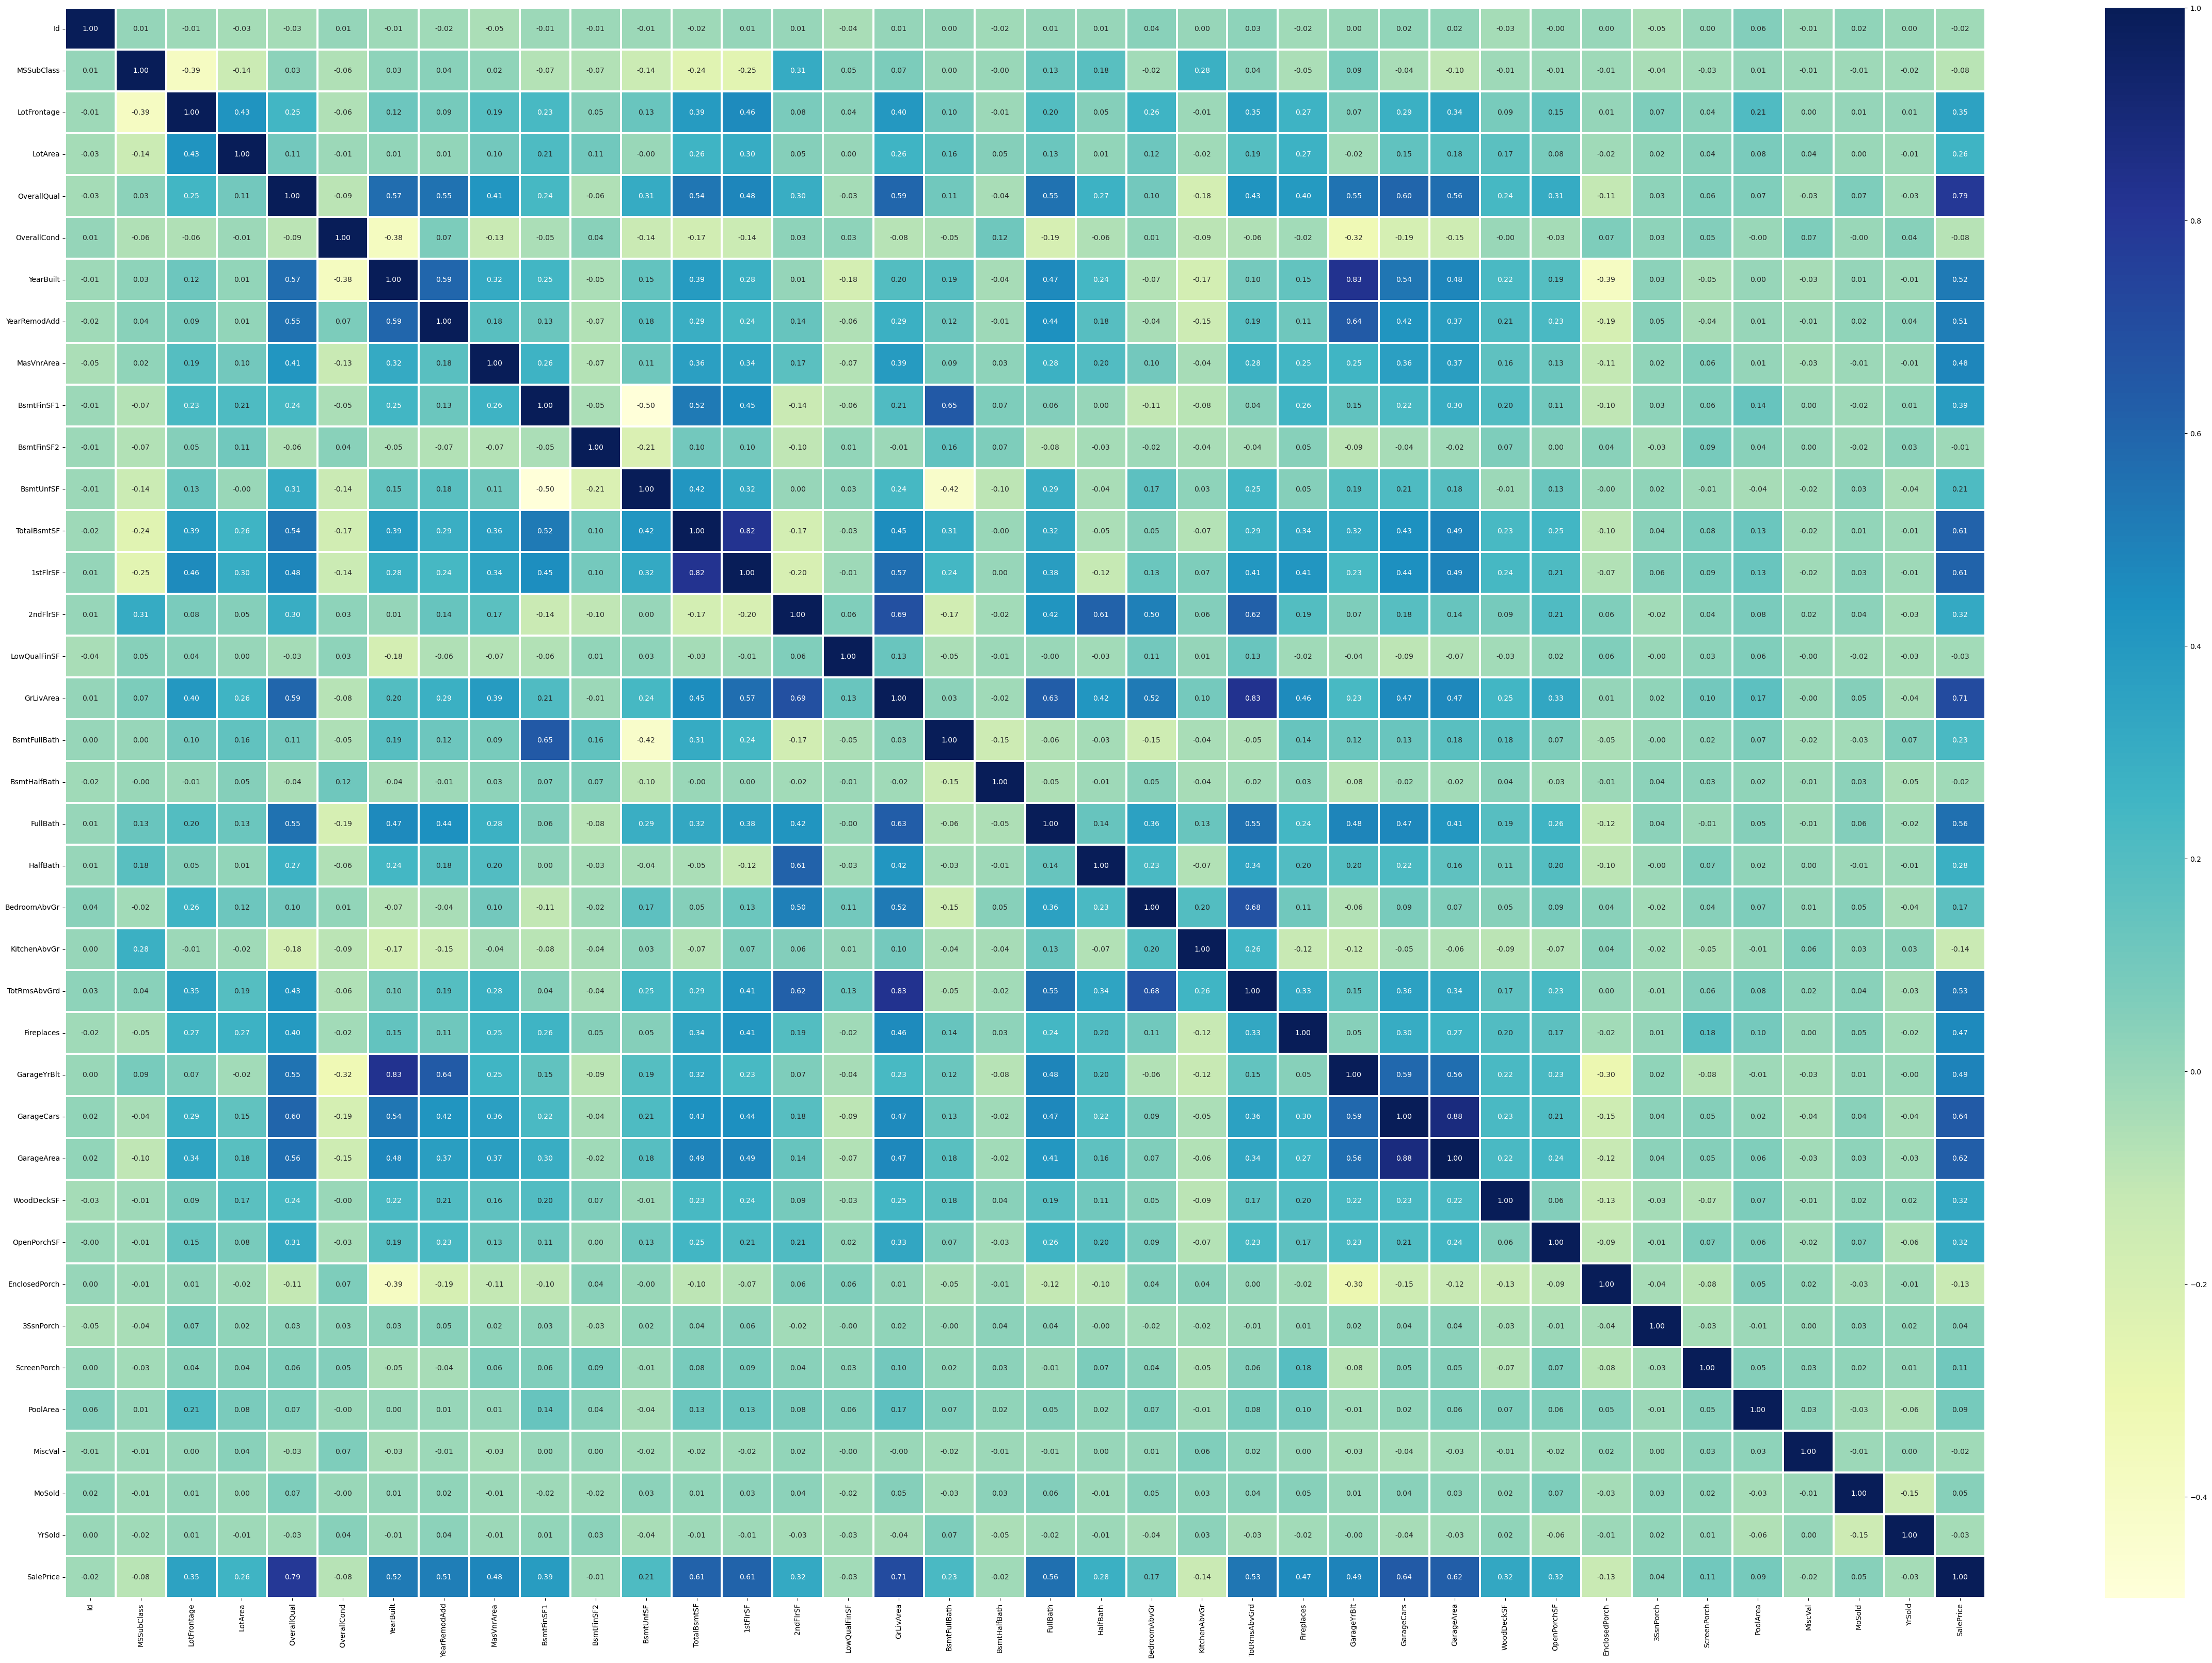

In [13]:
fig,ax=plt.subplots(figsize=(60,40))
sns.heatmap(correlation,
           cmap='YlGnBu',
            annot=True,
            fmt=".2f",
            linewidths=1.5)
plt.show()

# Data Analysis 

In [14]:
price_analysis=df_train.groupby('OverallQual')['SalePrice'].mean()
price_analysis

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64

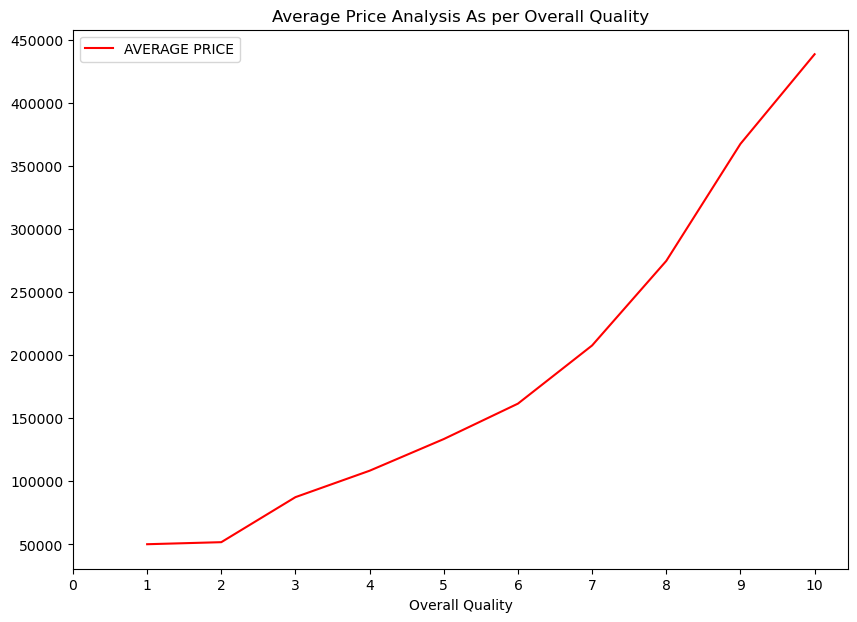

In [15]:
df_price=pd.DataFrame(price_analysis)
df_price.plot(kind='line',
             xlabel='Overall Quality',
              figsize=(10,7),
             title ="Average Price Analysis As per Overall Quality",
             color='red',
             xticks=range(0,11,1))
plt.legend(['AVERAGE PRICE'])
plt.show()

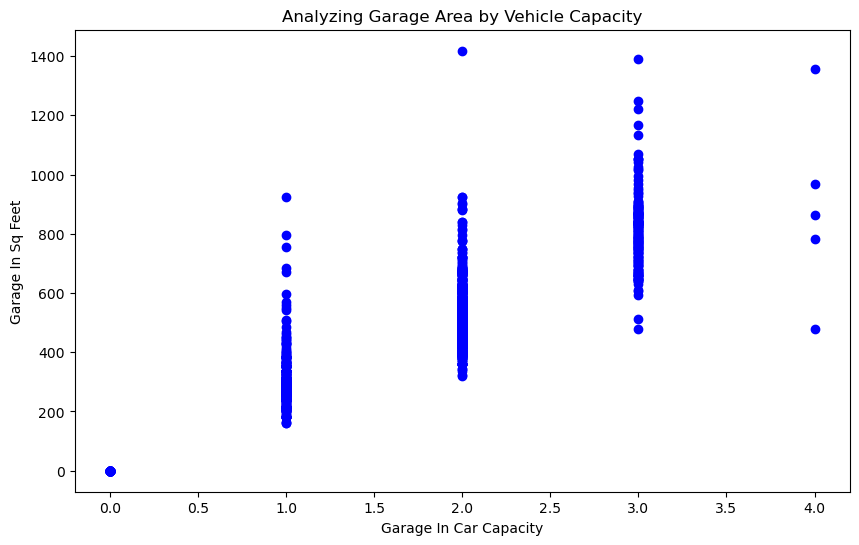

In [16]:

fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(x=df_train['GarageCars'],
           y=df_train['GarageArea'], c='blue')
ax.set(xlabel='Garage In Car Capacity',
      ylabel='Garage In Sq Feet',
      title='Analyzing Garage Area by Vehicle Capacity')
plt.show()


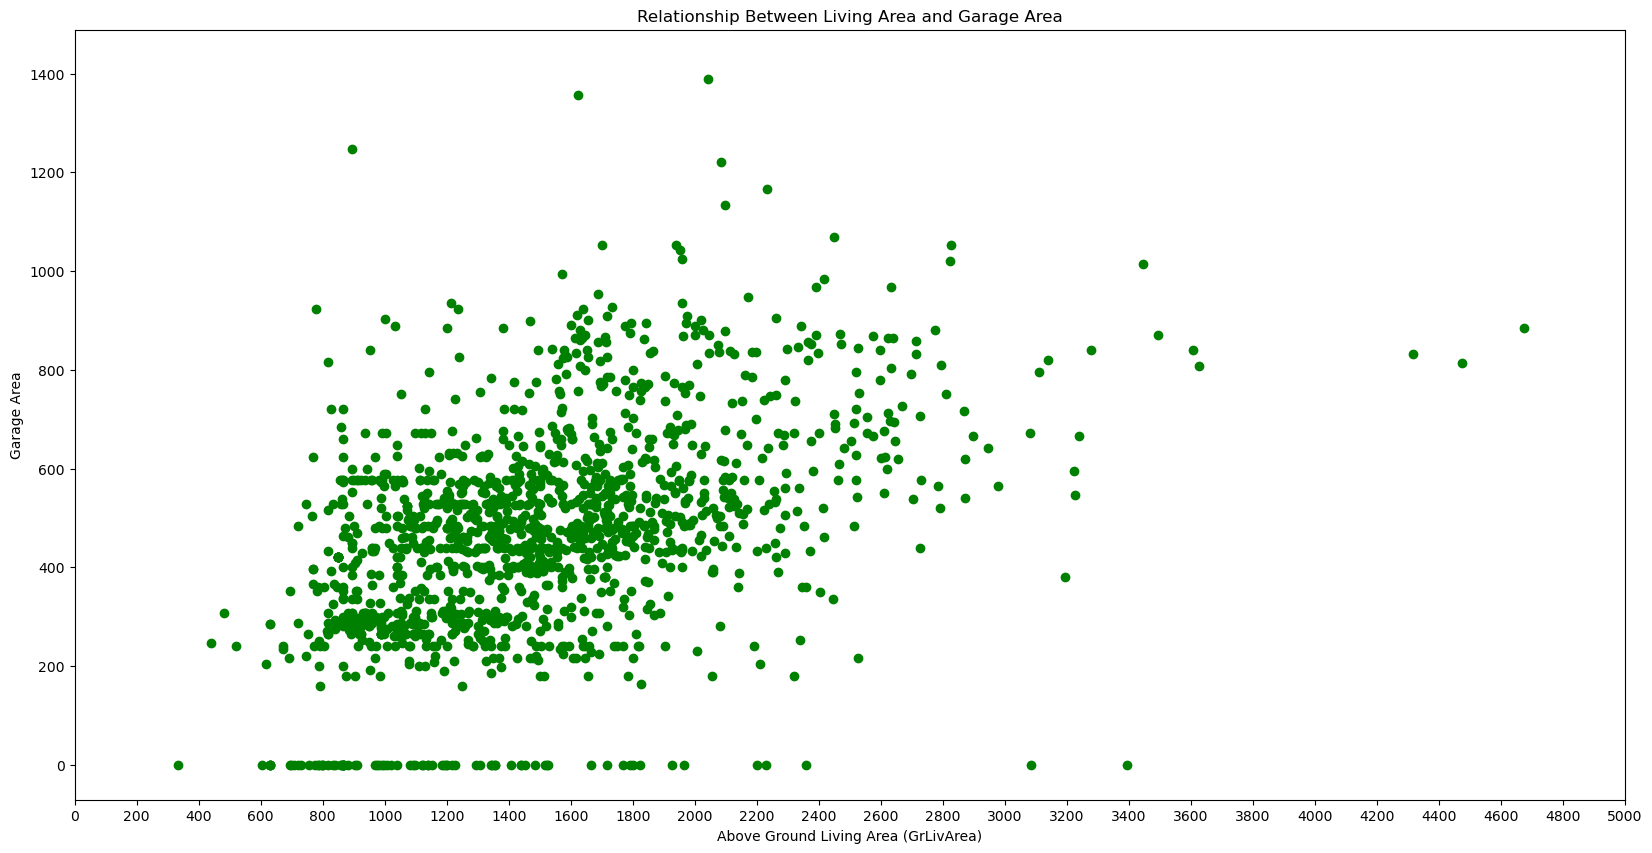

In [18]:
fig,ax=plt.subplots(figsize=(20,10))
ax.scatter(x=df_train['GrLivArea'],
           y=df_train['GarageArea'],c='green')
ax.set_xlim(0, 5000)  # Set limits for x-axis (change values based on your data)
ax.set_xticks(range(0, 5001, 200)) # # Set tick intervals (every 500 units)

ax.set_xlabel('Above Ground Living Area (GrLivArea)')
ax.set_ylabel('Garage Area')
ax.set_title('Relationship Between Living Area and Garage Area')
plt.show()

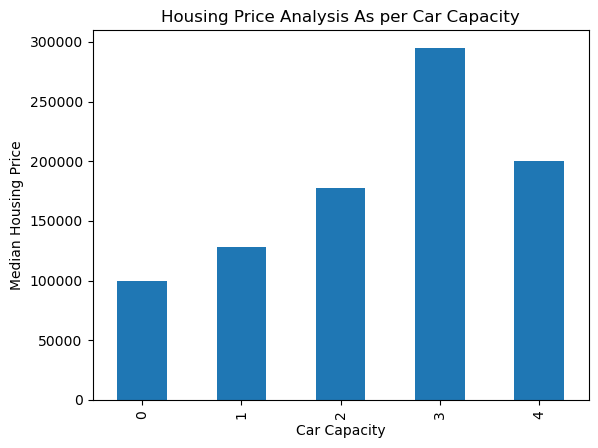

In [19]:
car=df_train.groupby("GarageCars")['SalePrice'].median()
car.plot(kind='bar',
        xlabel='Car Capacity',
        ylabel='Median Housing Price',
        title = "Housing Price Analysis As per Car Capacity",
        xticks=range(0,5,1))
plt.show()

# Change strings to numbers `

In [20]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [22]:
# finding column rows 

for label,content in df_train.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [23]:
# finding numeric columns 

for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


# Changing Strings to Categories 

In [24]:
for label,content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        df_train[label]=content.astype('category').cat.as_ordered()

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

# changing objects to categories 

In [26]:
for label,content in df_train.items():
    if pd.api.types.is_object_dtype(content):
        df_train[label]=content.astype('category').cat.as_ordered()

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

In [28]:
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):  # Check if the column is numeric
        print(f"Value counts for column: {label}")
        print(df_train[label].value_counts())
        print("-" * 40)


Value counts for column: Id
Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: count, Length: 1460, dtype: int64
----------------------------------------
Value counts for column: MSSubClass
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
----------------------------------------
Value counts for column: LotFrontage
LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64
----------------------------------------
Value counts for column: LotArea
LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: count, Length: 1073, dtype: int64
--------------

# Filling Missing Value 

## first we will fill numeric columns

In [29]:
for label,content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        # add binay columns which tells you us if the data was missing
        df_train[label+'is_missing']=pd.isnull(content)
        df_train[label] = content.fillna(content.median())

# checking missing values  in numeric columns 


In [30]:
for label,content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        print(f'These are the column name which contain isnull value:{label}')
        print(df_train[label].isnull().sum())
        print("--"*50)

These are the column name which contain isnull value:Id
0
----------------------------------------------------------------------------------------------------
These are the column name which contain isnull value:MSSubClass
0
----------------------------------------------------------------------------------------------------
These are the column name which contain isnull value:LotFrontage
0
----------------------------------------------------------------------------------------------------
These are the column name which contain isnull value:LotArea
0
----------------------------------------------------------------------------------------------------
These are the column name which contain isnull value:OverallQual
0
----------------------------------------------------------------------------------------------------
These are the column name which contain isnull value:OverallCond
0
----------------------------------------------------------------------------------------------------
These 

# Now we are going to fill categories 

In [31]:
# converting catergories to numbers and handling missing values 

for label,content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        # # add binary columns which tells us if the data was missing 
        df_train[label+'_is_missing']=pd.isnull(content)
        # turn categories into numbers and add 1 
        df_train[label]=pd.Categorical(content).codes+1

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14124\407220351.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[label+'_is_missing']=pd.isnull(content)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14124\407220351.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[label+'_is_missing']=pd.isnull(content)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14124\407220351.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

In [32]:
# checking missing values 

for column in df_train.columns:
    missing_count = df_train[column].isnull().sum()
    if missing_count > 0:
        print(f"Column '{column}' has {missing_count} missing values.")
    else:
        print(f"Column '{column}' has no missing values.")

Column 'Id' has no missing values.
Column 'MSSubClass' has no missing values.
Column 'MSZoning' has no missing values.
Column 'LotFrontage' has no missing values.
Column 'LotArea' has no missing values.
Column 'Street' has no missing values.
Column 'Alley' has no missing values.
Column 'LotShape' has no missing values.
Column 'LandContour' has no missing values.
Column 'Utilities' has no missing values.
Column 'LotConfig' has no missing values.
Column 'LandSlope' has no missing values.
Column 'Neighborhood' has no missing values.
Column 'Condition1' has no missing values.
Column 'Condition2' has no missing values.
Column 'BldgType' has no missing values.
Column 'HouseStyle' has no missing values.
Column 'OverallQual' has no missing values.
Column 'OverallCond' has no missing values.
Column 'YearBuilt' has no missing values.
Column 'YearRemodAdd' has no missing values.
Column 'RoofStyle' has no missing values.
Column 'RoofMatl' has no missing values.
Column 'Exterior1st' has no missing 

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 162 entries, Id to SaleCondition_is_missing
dtypes: bool(81), float64(3), int64(35), int8(43)
memory usage: 610.4 KB


In [34]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1,60,4,65.0,8450,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1,2,20,4,80.0,9600,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
2,3,60,4,68.0,11250,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
3,4,70,4,60.0,9550,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,5,60,4,84.0,14260,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,4,62.0,7917,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1456,1457,20,4,85.0,13175,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
1457,1458,70,4,66.0,9042,2,0,4,4,1,...,False,False,False,False,False,True,False,False,False,False
1458,1459,20,4,68.0,9717,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False


# Split the data into train and validation set 

In [35]:
# spliting the data 
X=df_train.drop('SalePrice',axis=1)
Y=df_train['SalePrice']

# fitting to the model first lets try random forest reggressor 


In [36]:
# fiiting 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2)

In [37]:
X_train.shape, X_valid.shape, Y_train.shape, Y_valid.shape

((1168, 161), (292, 161), (1168,), (292,))

In [38]:
model=RandomForestRegressor(n_jobs=-1,random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [39]:
model.score(X_train, Y_train)

0.9814964119105841

In [40]:
model.score(X_valid, Y_valid)

0.869830221787959

# lets try linear regression 

In [42]:
from sklearn.linear_model import LinearRegression
np.random.seed(42)
clf=LinearRegression()
clf.fit(X_train, Y_train)

LinearRegression()

In [43]:
clf.score(X_train, Y_train)

0.8741513068713295

In [44]:
clf.score(X_valid, Y_valid)

0.8750227041295132

# both the models are good and equal answers but random forest looks good in training score so lets try and tune random forest regressor

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# create a parameter for random forest classifier 
rf_grid={"n_estimators":np.arange(100,200,50),
        "max_depth":[None,3],
        "min_samples_split":np.arange(2,6,2),
        "min_samples_leaf":np.arange(1,6,2)}


In [46]:
# lets tune with Randomized search cv

np.random.seed(42)
try_rf=RandomizedSearchCV(RandomForestRegressor(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_jobs=-1,
                           n_iter=24,
                           verbose=True)
try_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=24,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3],
                                        'min_samples_leaf': array([1, 3, 5]),
                                        'min_samples_split': array([2, 4]),
                                        'n_estimators': array([100, 150])},
                   verbose=True)

In [47]:
try_rf.score(X_train,Y_train)

0.9814964119105841

In [48]:
try_rf.score(X_valid,Y_valid)

0.869830221787959

# lets try Grid Searchcv

In [49]:
np.random.seed(42)
try_grid=GridSearchCV(RandomForestRegressor(),
                 param_grid=rf_grid,
                     cv=5,
                     n_jobs=-1,
                     verbose=2)

try_grid.fit(X_train, Y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 3],
                         'min_samples_leaf': array([1, 3, 5]),
                         'min_samples_split': array([2, 4]),
                         'n_estimators': array([100, 150])},
             verbose=2)

In [50]:
try_grid.score(X_valid, Y_valid)

0.8703371556343112

In [51]:
try_grid.score(X_train,Y_train)

0.9788592396038531

In [52]:
# Grid Search looks good 
try_grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 150}

In [53]:
try_grid

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 3],
                         'min_samples_leaf': array([1, 3, 5]),
                         'min_samples_split': array([2, 4]),
                         'n_estimators': array([100, 150])},
             verbose=2)

# Evalution Metrics For Our Best model

In [54]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

def rmsle(y_test,y_preds): # # here def is function rmsle namma kudukura variable (y_test, y_preds you know this)
    """
    Calculate root mean squared log error between preditions and true labels.

    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# create function to evaluate model on a different levels 

def show_scores(model):
    train_preds= model.predict(X_train)
    val_preds= model.predict(X_valid)
    scores={"Taining MAE": mean_absolute_error(Y_train,train_preds),
           "Valid MAE":mean_absolute_error(Y_valid,val_preds),
            "Training RMSLE":rmsle(Y_train,train_preds),
            "Valid RMSLE":rmsle(Y_valid,val_preds),
            "Training R^2":r2_score(Y_train,train_preds),
            "Valid R^2":r2_score(Y_valid,val_preds)}
    return scores 


In [55]:
show_scores(try_grid)

{'Taining MAE': 7014.002962552463,
 'Valid MAE': 16040.738536891955,
 'Training RMSLE': 0.06281603295203829,
 'Valid RMSLE': 0.15275426944531317,
 'Training R^2': 0.9788592396038531,
 'Valid R^2': 0.8703371556343112}

# lets try with test data 

In [56]:
df_test=pd.read_csv('test.csv')
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [57]:
# checking missing values 
for column in df_test.columns:
    missing_count = df_test[column].isnull().sum()
    if missing_count > 0:
        print(f"Column '{column}' has {missing_count} missing values.")
    else:
        print(f"Column '{column}' has no missing values.")


Column 'Id' has no missing values.
Column 'MSSubClass' has no missing values.
Column 'MSZoning' has 4 missing values.
Column 'LotFrontage' has 227 missing values.
Column 'LotArea' has no missing values.
Column 'Street' has no missing values.
Column 'Alley' has 1352 missing values.
Column 'LotShape' has no missing values.
Column 'LandContour' has no missing values.
Column 'Utilities' has 2 missing values.
Column 'LotConfig' has no missing values.
Column 'LandSlope' has no missing values.
Column 'Neighborhood' has no missing values.
Column 'Condition1' has no missing values.
Column 'Condition2' has no missing values.
Column 'BldgType' has no missing values.
Column 'HouseStyle' has no missing values.
Column 'OverallQual' has no missing values.
Column 'OverallCond' has no missing values.
Column 'YearBuilt' has no missing values.
Column 'YearRemodAdd' has no missing values.
Column 'RoofStyle' has no missing values.
Column 'RoofMatl' has no missing values.
Column 'Exterior1st' has 1 missing 

# Change strings to categories 

In [58]:
for label,content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label]=content.astype('category').cat.as_ordered()

# change object to categories 

In [59]:
for label,content in df_test.items():
    if pd.api.types.is_object_dtype(content):
        df_test[label]=content.astype('category').cat.as_ordered()

In [60]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   int64   
 2   MSZoning       1455 non-null   category
 3   LotFrontage    1232 non-null   float64 
 4   LotArea        1459 non-null   int64   
 5   Street         1459 non-null   category
 6   Alley          107 non-null    category
 7   LotShape       1459 non-null   category
 8   LandContour    1459 non-null   category
 9   Utilities      1457 non-null   category
 10  LotConfig      1459 non-null   category
 11  LandSlope      1459 non-null   category
 12  Neighborhood   1459 non-null   category
 13  Condition1     1459 non-null   category
 14  Condition2     1459 non-null   category
 15  BldgType       1459 non-null   category
 16  HouseStyle     1459 non-null   category
 17  OverallQual    1459 non-null   in

# Fill missing values in numeric 

In [61]:
for label,content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        # add binay columns which tells you us if the data was missing
        df_test[label+'is_missing']=pd.isnull(content)
        df_test[label] = content.fillna(content.median())

# change categories to numbers 

In [62]:
# converting catergories to numbers and handling missing values 

for label,content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        # # add binary columns which tells us if the data was missing 
        df_test[label+'_is_missing']=pd.isnull(content)
        # turn categories into numbers and add 1 
        df_test[label]=pd.Categorical(content).codes+1

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14124\3926643745.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[label+'_is_missing']=pd.isnull(content)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14124\3926643745.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[label+'_is_missing']=pd.isnull(content)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14124\3926643745.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.

In [63]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1461,20,3,80.0,11622,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
1,1462,20,4,81.0,14267,2,0,1,4,1,...,False,False,False,False,False,True,True,False,False,False
2,1463,60,4,74.0,13830,2,0,1,4,1,...,False,False,False,False,False,True,False,True,False,False
3,1464,60,4,78.0,9978,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,1465,120,4,43.0,5005,2,0,1,2,1,...,False,False,False,False,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,5,21.0,1936,2,0,4,4,1,...,True,True,True,True,False,True,True,True,False,False
1455,2916,160,5,21.0,1894,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1456,2917,20,4,160.0,20000,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1457,2918,85,4,62.0,10441,2,0,4,4,1,...,True,True,True,True,False,True,False,False,False,False


In [64]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
940,941,90,4,55.0,12640,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
1430,1431,60,4,60.0,21930,2,0,3,4,1,...,False,False,False,False,False,True,True,True,False,False
1403,1404,20,4,49.0,15256,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
611,612,80,4,69.0,10395,2,0,1,4,1,...,False,False,False,False,False,True,False,False,False,False
904,905,20,4,69.0,6173,2,0,1,4,1,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,1169,70,4,120.0,13728,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
112,113,60,4,77.0,9965,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1268,1269,50,4,69.0,14100,2,0,1,4,1,...,False,False,False,False,False,True,False,True,False,False
1026,1027,20,4,73.0,9300,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False


In [65]:
set(X_train.columns) - set(df_test.columns)

{'SalePriceis_missing'}

In [66]:
df_test["SalePriceis_missing"] = False
df_test.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14124\1648157031.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test["SalePriceis_missing"] = False


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing,SalePriceis_missing
0,1461,20,3,80.0,11622,2,0,4,4,1,...,False,False,False,False,True,False,True,False,False,False
1,1462,20,4,81.0,14267,2,0,1,4,1,...,False,False,False,False,True,True,False,False,False,False
2,1463,60,4,74.0,13830,2,0,1,4,1,...,False,False,False,False,True,False,True,False,False,False
3,1464,60,4,78.0,9978,2,0,1,4,1,...,False,False,False,False,True,True,True,False,False,False
4,1465,120,4,43.0,5005,2,0,1,2,1,...,False,False,False,False,True,True,True,False,False,False


In [67]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
940,941,90,4,55.0,12640,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
1430,1431,60,4,60.0,21930,2,0,3,4,1,...,False,False,False,False,False,True,True,True,False,False
1403,1404,20,4,49.0,15256,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
611,612,80,4,69.0,10395,2,0,1,4,1,...,False,False,False,False,False,True,False,False,False,False
904,905,20,4,69.0,6173,2,0,1,4,1,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,1169,70,4,120.0,13728,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
112,113,60,4,77.0,9965,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1268,1269,50,4,69.0,14100,2,0,1,4,1,...,False,False,False,False,False,True,False,True,False,False
1026,1027,20,4,73.0,9300,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False


In [68]:
# align the data 
# Align test data columns to match training data columns
df_test_aligned = df_test[X_train.columns]


In [69]:
# now start predict 
final=try_grid.predict(df_test_aligned)
final

array([124546.26026984, 155251.81626984, 173981.48474074, ...,
       154599.19087566, 114569.12396825, 227043.44910053])

In [90]:
# Final Prediction for test data 
#prediction = pd.DataFrame(final, columns=['Sale Price Prediction'])
# Assuming df_test has an 'Id' column
prediction = pd.DataFrame({
    'Id': df_test['Id'], 
    'SalePrice': final
})
prediction

,Id,SalePrice
0,1461,124546.260270
1,1462,155251.816270
2,1463,173981.484741
3,1464,182013.547566
4,1465,206619.765693
...,...,...
1454,2915,86778.973723
1455,2916,88785.730014
1456,2917,154599.190876
1457,2918,114569.123968


In [92]:
prediction.to_csv(r'C:\Users\ADMIN\Downloads\newpredictionss.csv', index=False)


# Thats it 
